In [1]:
import pandas as pd
import numpy as np
import pylab as py
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
forbes = pd.read_csv('desktop/myproject/Forbes_update.csv')

In [3]:
forbes.head(5)

,Rank,Name,GDP Growth,GDP per Capita,Trade Balance/GDP,Number in text,Pop in millions,Millions
0,1,United Kingdom,1.7,39700,-3.8,65.1,65.1,M
1,2,Sweden,2.1,53400,3.3,9,9.0,M
2,3,Hong Kong,3.8,46200,4.3,7.2,7.2,M
3,4,Netherlands,2.9,48200,10.5,17.2,17.2,M
4,5,New Zealand,3.0,42900,-2.7,4.5,4.5,M


In [4]:
forbes.rename(columns={'GDP Growth': 'GDP_Growth', 'GDP per Capita' : 'GDP_per_Capita', 'Trade Balance/GDP' : 'Trade_balance/GDP', 'Pop in millions': 'Population'}, inplace = True)

In [5]:
forbes

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade_balance/GDP,Number in text,Population,Millions
0,1,United Kingdom,1.7,39700,-3.8,65.1,65.1,M
1,2,Sweden,2.1,53400,3.3,9,9.0,M
2,3,Hong Kong,3.8,46200,4.3,7.2,7.2,M
3,4,Netherlands,2.9,48200,10.5,17.2,17.2,M
4,5,New Zealand,3.0,42900,-2.7,4.5,4.5,M
...,...,...,...,...,...,...,...,...
156,157,Chad,-3.1,700,-5.7,15.8,15.8,M
157,158,Equatorial Guinea,-3.2,9900,-5.9,0.8,0.8,M
158,159,Guinea-Bissau,5.9,700,-2.0,1.8,1.8,M
159,160,Republic of the Congo,-3.1,1700,-12.9,5.1,5.1,M


* GDP per capita stands for Gross Domestic Product (GDP) per capita (per person).
* GDP per capita is a country’s economic output divided by its population. 
It's a good representation of a country's standard of living.  
* The balance of trade refers to the difference between a country’s exports and imports.


In [6]:
#check the null values
nan_values = forbes.isna()
nan_columns =nan_values.any()
nan_columns

Rank                 False
Name                 False
GDP_Growth           False
GDP_per_Capita       False
Trade_balance/GDP    False
Number in text       False
Population           False
Millions             False
dtype: bool

In [7]:
# Sorting Data in ascending order
cd=forbes[forbes.columns[1:3]].sort_values(forbes.columns[2],ascending=False).head(10)
cd

,Name,GDP_Growth
151,Libya,64.0
145,Ethiopia,10.9
93,Ghana,8.4
150,Guinea,8.2
115,Nepal,7.9
116,Cote d'Ivoire,7.8
80,Armenia,7.5
56,Turkey,7.4
108,Bangladesh,7.4
105,Bhutan,7.4


Text(0.5, 8.95999999999998, 'percentage %')

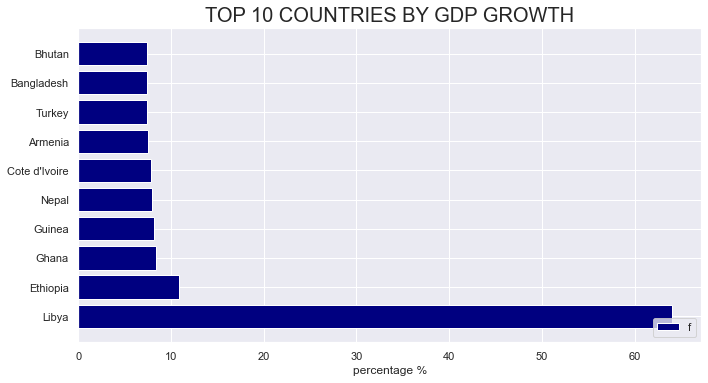

In [8]:
# plot visualization
sns.set(style='darkgrid')
fig=py.figure(figsize=(10,5))
py.barh(cd['Name'],cd['GDP_Growth'],color='#000080')

py.tight_layout()
py.legend('forbes',loc=4)
py.title('TOP 10 COUNTRIES BY GDP GROWTH',fontdict={'fontsize': 20})
py.savefig('plt')
py.xlabel('percentage %')

In [9]:
capita=forbes[forbes.columns[1:4:2]].sort_values(forbes.columns[3],ascending=False).head(10)
capita

,Name,GDP_per_Capita
22,Luxembourg,104100
9,Switzerland,80200
14,Norway,75500
25,Iceland,70100
10,Ireland,69300
44,Qatar,63500
16,United States,59500
7,Singapore,57700
6,Denmark,56300
8,Australia,53800


In [10]:
forbes.columns[1:4:2]

Index(['Name', 'GDP_per_Capita'], dtype='object')

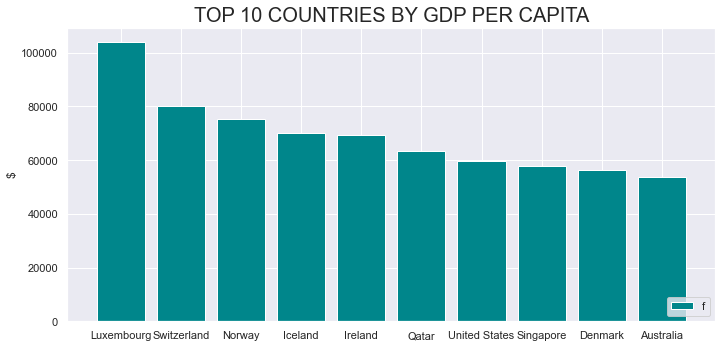

In [11]:
# plot visualization
sns.set(style='darkgrid')
fig=py.figure(figsize=(10,5))
py.bar(capita['Name'],capita['GDP_per_Capita'],color='#00868B')

py.tight_layout()
py.legend('forbes',loc=4)
py.title('TOP 10 COUNTRIES BY GDP PER CAPITA',fontdict={'fontsize': 20})
py.tight_layout()
py.ylabel('$')
py.savefig('plt')

In [12]:
# countries with the lowest GDP Growth
ppt=forbes[forbes.columns[1:3]].sort_values(forbes.columns[2],ascending=True).head(10)
ppt

,Name,GDP_Growth
153,Syria,-36.5
142,Venezuela,-14.0
152,Yemen,-5.9
110,Timor-Leste,-4.6
70,Kuwait,-3.3
157,Equatorial Guinea,-3.2
159,Republic of the Congo,-3.1
156,Chad,-3.1
84,Trinidad and Tobago,-2.6
137,Angola,-2.5


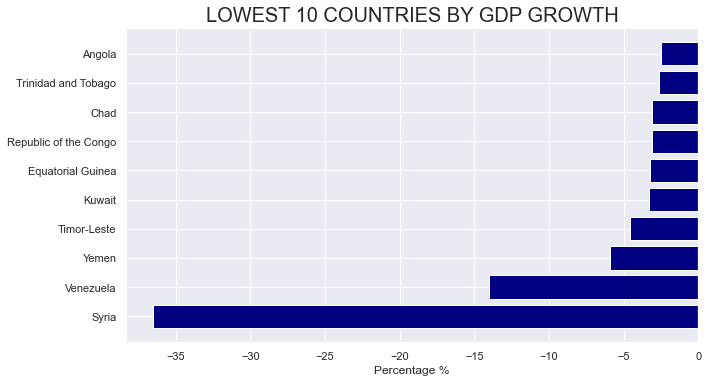

In [13]:
# Visualization plot
fig=py.figure(figsize=(10,5))
py.barh(ppt['Name'],ppt['GDP_Growth'],color='#000080')
py.tight_layout()
py.title('LOWEST 10 COUNTRIES BY GDP GROWTH',fontdict={'fontsize': 20})
py.xlabel('Percentage %')
py.savefig('plt')

In [14]:
forbes[forbes.columns[1:4:2]].sort_values(forbes.columns[3],ascending=True).head(10)

,Name,GDP_per_Capita
135,Malawi,300
148,Burundi,300
160,Central African Republic,400
126,Niger,400
124,Madagascar,400
144,Mozambique,400
140,Liberia,500
149,Democratic Republic of the Congo,500
130,Sierra Leone,500
154,Gambia,500


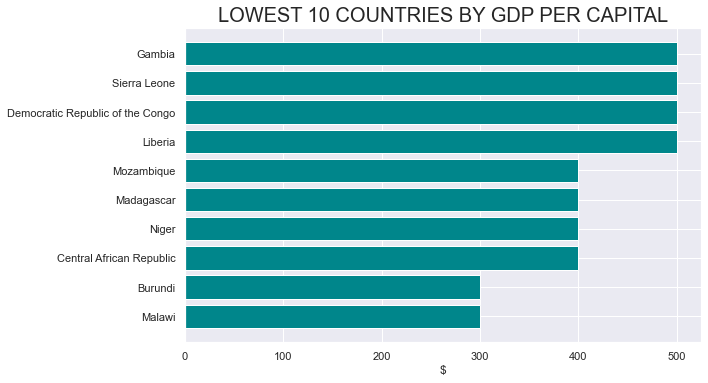

In [15]:
fig=py.figure(figsize=(10,5))
py.barh(forbes[forbes.columns[1:4:2]].sort_values(forbes.columns[3],ascending=True).head(10)['Name'],
       forbes[forbes.columns[1:4:2]].sort_values(forbes.columns[3],ascending=True).head(10)['GDP_per_Capita'],color ='#00868B')
py.tight_layout()
py.title('LOWEST 10 COUNTRIES BY GDP PER CAPITAL',fontdict={'fontsize': 20})
py.xlabel('$')
py.savefig('plt')

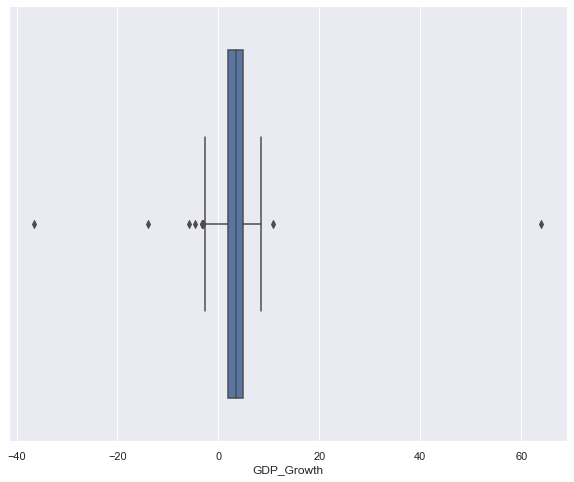

In [16]:
# Finding the outliers using boxplot
fig=py.figure(figsize=(10,8))
sns.boxplot(x=forbes['GDP_Growth'])
py.savefig('plt')

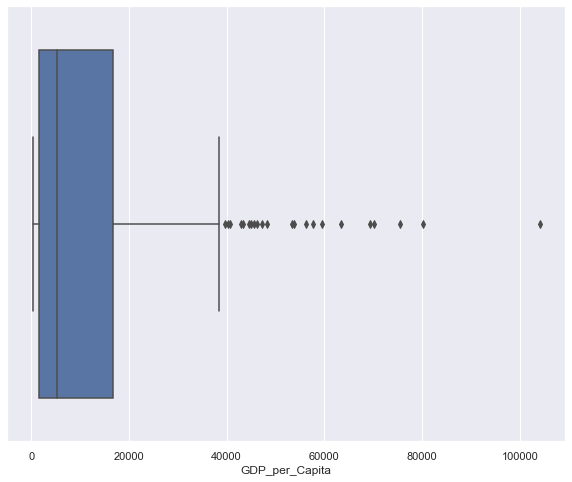

In [17]:
fig=py.figure(figsize=(10,8))
sns.boxplot(x=forbes['GDP_per_Capita'])
py.savefig('plt')

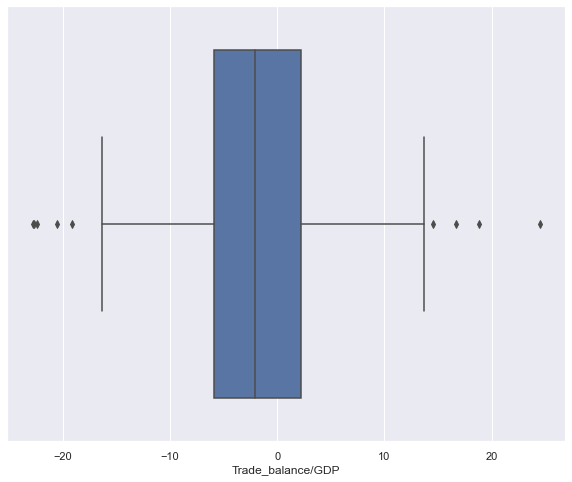

In [18]:
fig=py.figure(figsize=(10,8))
sns.boxplot(x=forbes['Trade_balance/GDP'])
py.savefig('plt')

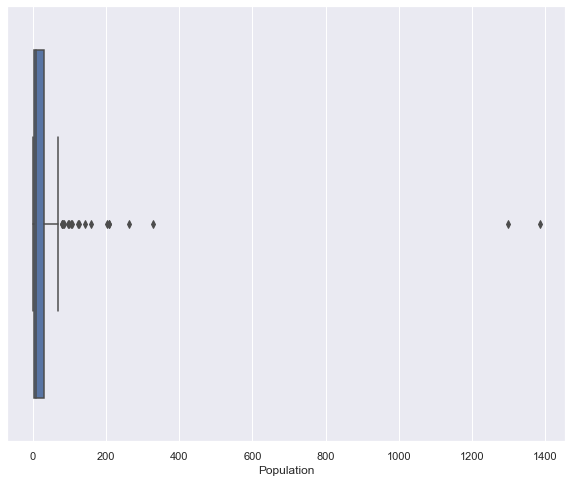

In [19]:
fig=py.figure(figsize=(10,8))
sns.boxplot(x=forbes['Population'])
py.savefig('plt')

*   These values which lies on either of the extremes can be considered abnormal and should 
be discarded from the entire series so that any analysis made on this series is not influenced by these extreme values. 
* So the data series that should be considered for further observation or study after discarding the outliers are as below.

In [20]:

# Relationship between population and GDP Growth
plot_1=forbes[['GDP_Growth','Population']].head(10)
plot_1

,GDP_Growth,Population
0,1.7,65.1
1,2.1,9.0
2,3.8,7.2
3,2.9,17.2
4,3.0,4.5
5,3.0,35.9
6,2.3,5.8
7,3.6,5.0
8,2.2,23.5
9,1.7,8.3


In [21]:
#fig=py.figure(figsize=(20,15))
#py.scatter(plot_1['Population'],plot_1['GDP_Growth'],marker='o',linewidths=10,color='black')
#py.savefig('plt')

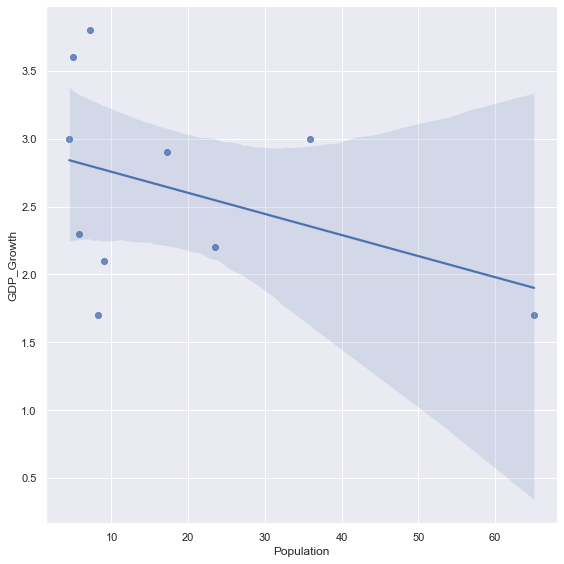

In [22]:
sns.lmplot(y='GDP_Growth',x='Population',data=forbes.head(10),height=8)
py.savefig('plt')

In [23]:
plot_2=forbes[['GDP_Growth','Trade_balance/GDP']].head(10)
plot_2

,GDP_Growth,Trade_balance/GDP
0,1.7,-3.8
1,2.1,3.3
2,3.8,4.3
3,2.9,10.5
4,3.0,-2.7
5,3.0,-2.9
6,2.3,7.6
7,3.6,18.8
8,2.2,-2.6
9,1.7,9.8


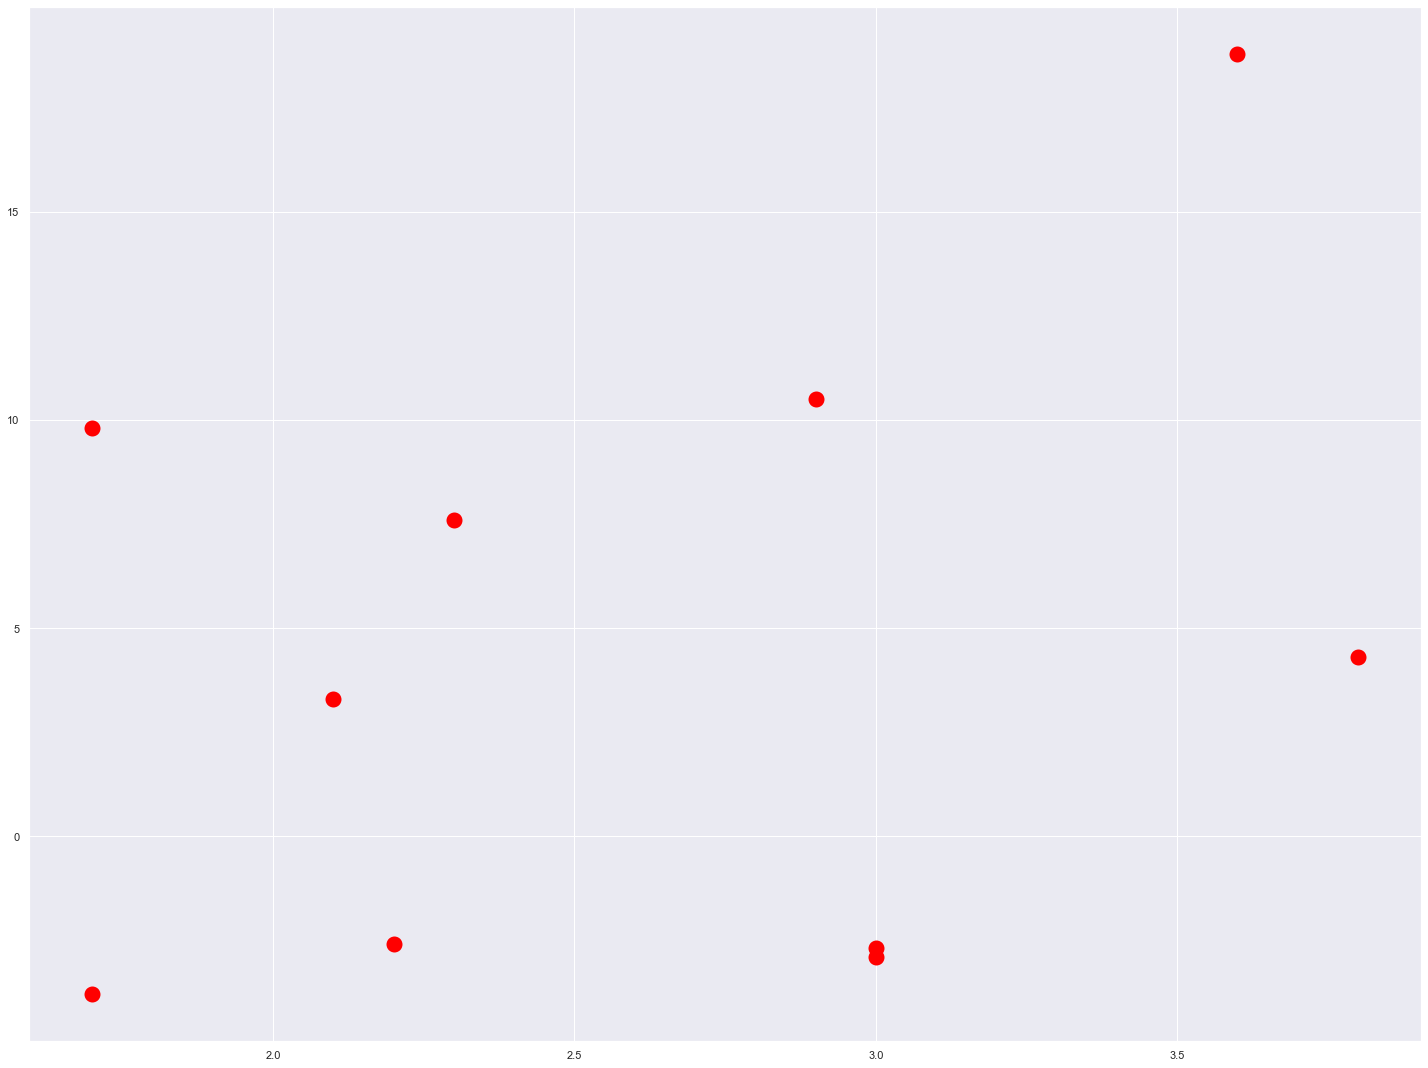

In [24]:
fig=py.figure(figsize=(20,15))
py.scatter(plot_2['GDP_Growth'],plot_2['Trade_balance/GDP'],marker='o',linewidths=10,color='red')
py.tight_layout()
py.savefig('plt')


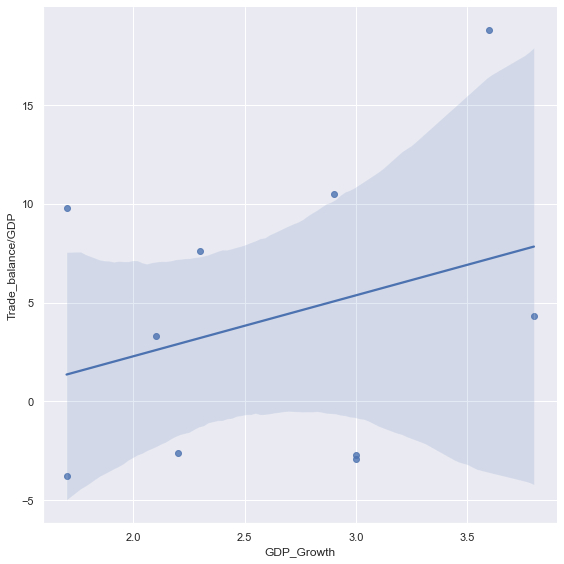

In [25]:
sns.lmplot(x='GDP_Growth',y='Trade_balance/GDP',data=forbes.head(10),height=8)
py.savefig('plt')

In [26]:
plot_3=forbes[['GDP_per_Capita','Trade_balance/GDP']].head(10)
plot_3

,GDP_per_Capita,Trade_balance/GDP
0,39700,-3.8
1,53400,3.3
2,46200,4.3
3,48200,10.5
4,42900,-2.7
5,45000,-2.9
6,56300,7.6
7,57700,18.8
8,53800,-2.6
9,80200,9.8


In [27]:
#fig = py.figure(figsize=(10,20))
#py.scatter(plot_3['GDP_per_Capita'],plot_3['Trade_balance/GDP'],marker='o',linewidths=10)
#py.savefig('plt')

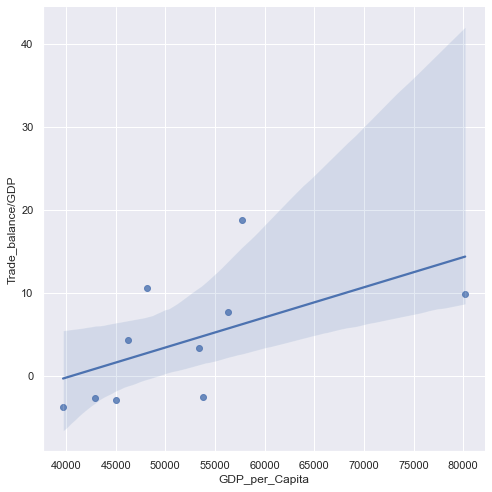

In [28]:
sns.lmplot(x='GDP_per_Capita',y='Trade_balance/GDP',data=forbes.head(10),height=7)
py.savefig('plt')

* Forbes determined the Best Countries for Business by rating 161 nations on 15 different factors:
    property rights, innovation, taxes, technology, corruption, infrastructure, market size,
  political risk, quality of life, workforce, freedom (personal, trade and monetary), 
  red tape and investor protection. Each category was equally weighted.

* Key highlights about the UK’s ranking as the Best Country for Business:

* This is the second consecutive year that the UK has topped the list.
* The UK was the only country to rank among the top 30 countries (out of 161 countries ranked) in each of the
15 metrics used to rate the countries.

* Sweden moves up two spots to second. It scored highly for its technological readiness and low corruption.


In [29]:

pd.set_option('display.max_rows', None)

In [30]:
forbes

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade_balance/GDP,Number in text,Population,Millions
0,1,United Kingdom,1.7,39700,-3.8,65.1,65.1,M
1,2,Sweden,2.1,53400,3.3,9,9.0,M
2,3,Hong Kong,3.8,46200,4.3,7.2,7.2,M
3,4,Netherlands,2.9,48200,10.5,17.2,17.2,M
4,5,New Zealand,3.0,42900,-2.7,4.5,4.5,M
5,6,Canada,3.0,45000,-2.9,35.9,35.9,M
6,7,Denmark,2.3,56300,7.6,5.8,5.8,M
7,8,Singapore,3.6,57700,18.8,5,5.0,M
8,9,Australia,2.2,53800,-2.6,23.5,23.5,M
9,10,Switzerland,1.7,80200,9.8,8.3,8.3,M


In [31]:
#forbes.info()

In [32]:
#forbes.describe()

In [33]:
#looking at the histogram of the dataset
#forbes.hist(figsize=(20,30))

In [34]:
forbes.columns

Index(['Rank', 'Name', 'GDP_Growth', 'GDP_per_Capita', 'Trade_balance/GDP',
       'Number in text', 'Population', 'Millions'],
      dtype='object')

In [35]:
#pd.set_option('display.max_rows', 161)

In [36]:
#df =forbes
#forbes.groupby("Name")
#df.isin(['Nigeria','Ghana','South Africa','Republic of the Congo','Central African Republic','Mauritius','Morocco',
               #'Seychelles','Equatorial Guinea','Chad','Tunisia',' Botswana', 'Rwanda','Kenya', 'Egypt', 'Namibia', 'Senegal',
              # 'Zambia', 'Cape Verde','Liberia', 'Maurtania', 'Mozambique', 'Ethiopia', 'Gabon', ' Burundi', 
               #' Democratic Republic of the Congo','Guinea', 'Libya', 'Gambia', 'Guinea-Bissau']))


In [37]:
africa=['Nigeria','Ghana','South Africa','Republic of the Congo','Central African Republic','Mauritius','Morocco',
               'Seychelles','Equatorial Guinea','Chad','Tunisia',' Botswana', 'Rwanda','Kenya', 'Egypt', 'Namibia', 'Senegal',
               'Zambia', 'Cape Verde','Liberia', 'Maurtania', 'Mozambique', 'Ethiopia', 'Gabon', ' Burundi', 
               ' Democratic Republic of the Congo','Guinea', 'Libya', 'Gambia', 'Guinea-Bissau']

In [38]:
afri=forbes['Name'].isin(africa)

In [39]:
#forbes[afri]

In [40]:
#  African countries with the lowest GDP Growth
Acc=forbes[afri][forbes[afri].columns[1:3]].sort_values(forbes[afri].columns[2],ascending=True).head(5)
Acc

,Name,GDP_Growth
157,Equatorial Guinea,-3.2
156,Chad,-3.1
159,Republic of the Congo,-3.1
95,Namibia,-0.8
146,Gabon,0.5


Text(0.5, 8.95999999999998, '%')

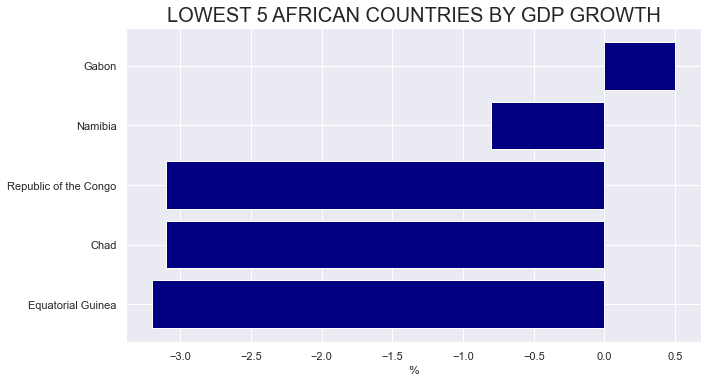

In [41]:
# Visualization plot
fig=py.figure(figsize=(10,5))
py.barh(Acc['Name'],Acc['GDP_Growth'],color='#000080')
py.tight_layout()
py.title('LOWEST 5 AFRICAN COUNTRIES BY GDP GROWTH',fontdict={'fontsize': 20})
py.savefig('plt')
py.xlabel('%')

In [42]:
#  African countries with the lowest GDP per Capita
Atc=forbes[afri][forbes[afri].columns[1:4:2]].sort_values(forbes[afri].columns[3],ascending=True).head(5)
Atc

,Name,GDP_per_Capita
160,Central African Republic,400
144,Mozambique,400
140,Liberia,500
154,Gambia,500
158,Guinea-Bissau,700


Text(0.5, 8.95999999999998, '$')

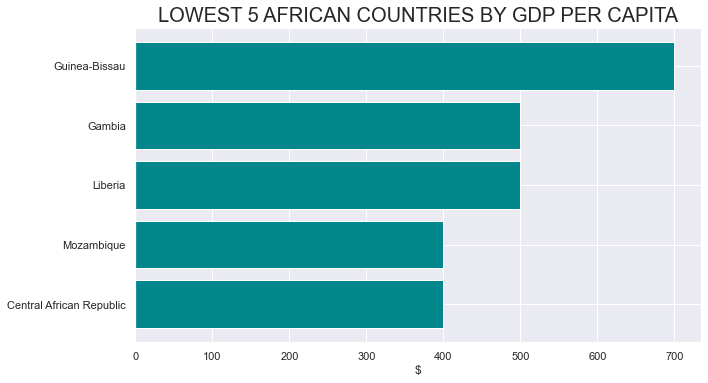

In [43]:
# Visualization plot
fig=py.figure(figsize=(10,5))
py.barh(Atc['Name'],Atc['GDP_per_Capita'], color='#00868B')
py.tight_layout()
py.title('LOWEST 5 AFRICAN COUNTRIES BY GDP PER CAPITA',fontdict={'fontsize': 20})
py.savefig('plt')
py.xlabel('$')

In [44]:
dc=forbes[afri][forbes[afri].columns[1:3]].sort_values(forbes[afri].columns[2],ascending=False).head(5)
dc

,Name,GDP_Growth
151,Libya,64.0
145,Ethiopia,10.9
93,Ghana,8.4
150,Guinea,8.2
99,Senegal,7.2


Text(0.5, 1.0, 'TOP 5 AFRICAN COUNTRIES BY GDP GROWTH')

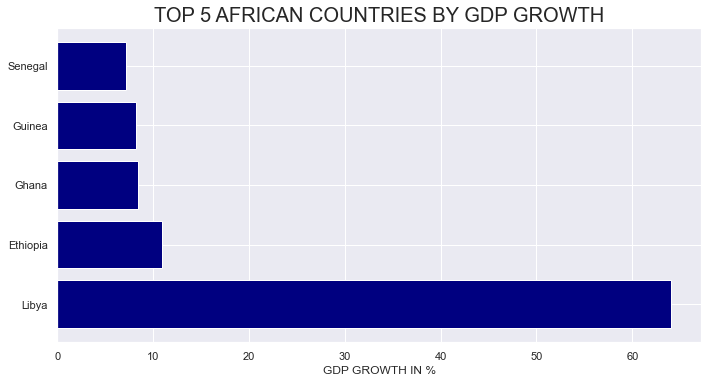

In [45]:
# Visualization plot
fig=py.figure(figsize=(10,5))
py.barh(dc['Name'],dc['GDP_Growth'],color='#000080')
py.tight_layout()
py.xlabel('GDP GROWTH IN %')
py.title('TOP 5 AFRICAN COUNTRIES BY GDP GROWTH',fontdict={'fontsize': 20})


In [46]:
ac=forbes[afri][forbes[afri].columns[1:4:2]].sort_values(forbes[afri].columns[3],ascending=False).head(5)
ac

,Name,GDP_per_Capita
65,Seychelles,15500
38,Mauritius,10500
157,Equatorial Guinea,9900
151,Libya,8000
146,Gabon,7200


Text(0.5, 1.0, 'TOP 5 AFRICAN COUNTRIES BY GDP PER CAPITA')

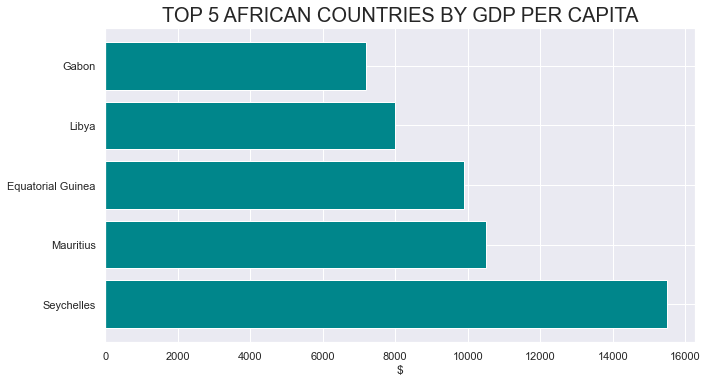

In [47]:
fig=py.figure(figsize=(10,5))
py.barh(ac['Name'],ac['GDP_per_Capita'],color='#00868B')
py.tight_layout()
py.xlabel('$')
py.title('TOP 5 AFRICAN COUNTRIES BY GDP PER CAPITA',fontdict={'fontsize': 20})

In [48]:
Europe =['United Kingdom', 'Sweden', 'Netherlands','Norway', 'Denmark', 'Finland', 'Albania', 'Russia', 'Germany',
        'Portugal', 'Czech Republic', 'Belgium', 'Bulgaria','Croatia', 'Cyprus', 'Estonia', 'France', 'Greece',
         'Hungary',' Ireland','Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Poland', 'Romania', 'Slovakia', 
         'Slovenia','Spain', 'Azerbaijan',
         'Belarus', 'Austria','Switzerland', 'Serbia','Bosnia and Herzegovina','Kosovo','Liechtenstein', 'Moldova'
         'Monaco','Montenegro','North Macedonia','San Marino','Vatican City','Andorra']


In [49]:
Euro=forbes['Name'].isin(Europe)

In [50]:
#forbes[Euro]

In [51]:
#  Europe countries with the lowest GDP Growth
eu=forbes[Euro][forbes[Euro].columns[1:3]].sort_values(forbes[Euro].columns[2],ascending=True).head(5)
eu

,Name,GDP_Growth
69,Azerbaijan,0.1
41,Greece,1.4
29,Italy,1.5
54,Russia,1.5
19,Belgium,1.7


Text(0.5, 8.95999999999998, '%')

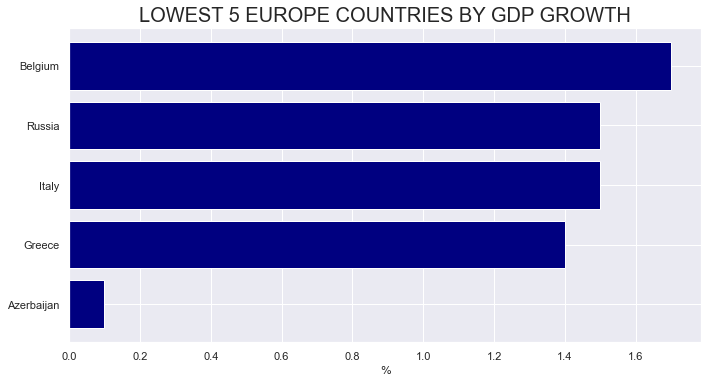

In [52]:
# Visualization plot
fig=py.figure(figsize=(10,5))
py.barh(eu['Name'],eu['GDP_Growth'],color='#000080')
py.tight_layout()
py.title('LOWEST 5 EUROPE COUNTRIES BY GDP GROWTH',fontdict={'fontsize': 20})
py.savefig('plt')
py.xlabel('%')

In [53]:
#  Europe countries with the lowest GDP PER CAPITA
eu=forbes[Euro][forbes[Euro].columns[1:4:2]].sort_values(forbes[Euro].columns[3],ascending=True).head(5)
eu

,Name,GDP_per_Capita
69,Azerbaijan,4100
73,Albania,4500
97,Bosnia and Herzegovina,5200
87,Belarus,5700
55,Serbia,5900


Text(0.5, 8.95999999999998, '$')

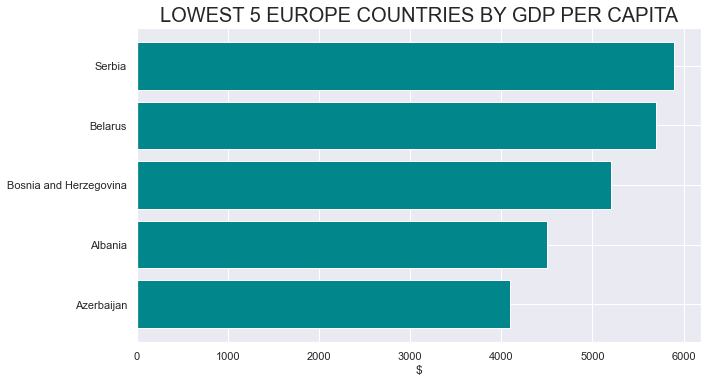

In [54]:
# Visualization plot
fig=py.figure(figsize=(10,5))
py.barh(eu['Name'],eu['GDP_per_Capita'],color='#00868B')
py.tight_layout()
py.title('LOWEST 5 EUROPE COUNTRIES BY GDP PER CAPITA',fontdict={'fontsize': 20})
py.savefig('plt')
py.xlabel('$')

In [55]:
au=forbes[Euro][forbes[Euro].columns[1:3]].sort_values(forbes[Euro].columns[2],ascending=False).head(5)
au

,Name,GDP_Growth
40,Romania,6.9
42,Malta,6.7
30,Slovenia,5.0
27,Estonia,4.9
33,Poland,4.7


Text(0.5, 1.0, 'TOP 5 EUROPE COUNTRIES BY GDP GROWTH')

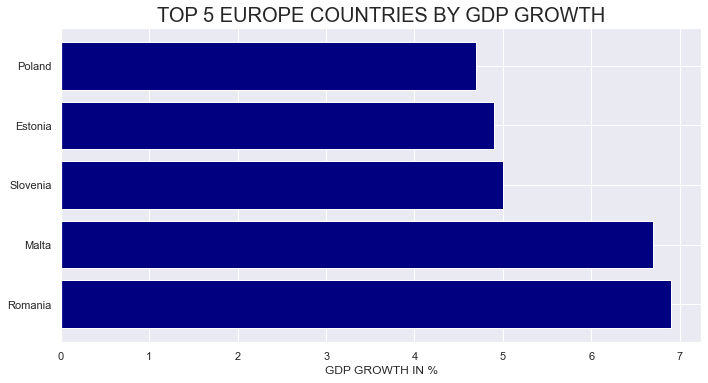

In [56]:
# Visualization plot
fig=py.figure(figsize=(10,5))
py.barh(au['Name'],au['GDP_Growth'],color='#000080')
py.tight_layout()
py.xlabel('GDP GROWTH IN %')
py.title('TOP 5 EUROPE COUNTRIES BY GDP GROWTH',fontdict={'fontsize': 20})


In [57]:
ap=forbes[Euro][forbes[Euro].columns[1:4:2]].sort_values(forbes[Euro].columns[3],ascending=False).head(5)
ap

,Name,GDP_per_Capita
22,Luxembourg,104100
9,Switzerland,80200
14,Norway,75500
6,Denmark,56300
1,Sweden,53400


Text(0.5, 1.0, 'TOP 5 EUROPE COUNTRIES BY GDP PER CAPITA')

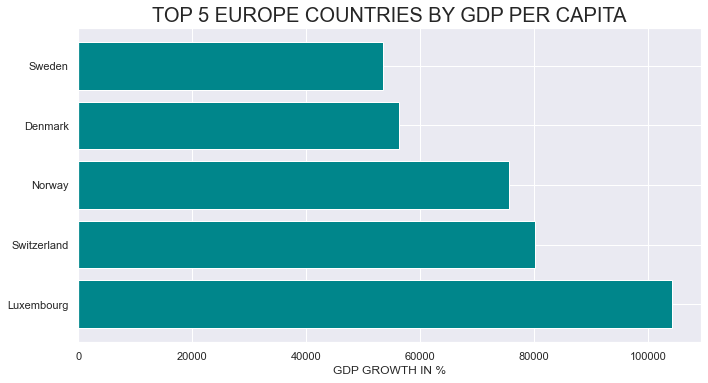

In [58]:
# Visualization plot
fig=py.figure(figsize=(10,5))
py.barh(ap['Name'],ap['GDP_per_Capita'],color='#00868B')
py.tight_layout()
py.xlabel('GDP GROWTH IN %')
py.title('TOP 5 EUROPE COUNTRIES BY GDP PER CAPITA',fontdict={'fontsize': 20})


In [59]:
Asian =['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Georgia', 
        'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan','Laos',
        'Lebanon','Malaysia', 'Maldives', 'Mongolia', 'Myanmar (Burma)', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Philippines',
        'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Tajikistan', 'Thailand',
        'Timor-Leste (East Timor)', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen','Hong Kong']

In [60]:
asia=forbes['Name'].isin(Asian)

In [61]:
#forbes[asia]

In [62]:
#  Asian countries with the lowest GDP Growth
asi=forbes[asia][forbes[asia].columns[1:3]].sort_values(forbes[asia].columns[2],ascending=True).head(5)
asi

,Name,GDP_Growth
153,Syria,-36.5
152,Yemen,-5.9
70,Kuwait,-3.3
129,Iraq,-2.1
50,Saudi Arabia,-0.9


Text(0.5, 1.0, 'LOWEST 5 ASIAN COUNTRIES BY GDP GROWTH')

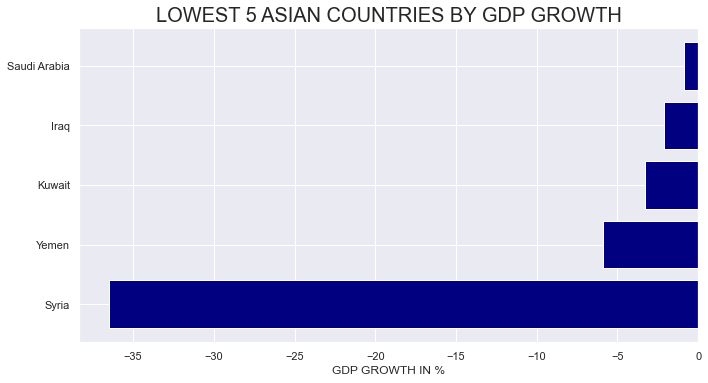

In [63]:
# Visualization plot
fig=py.figure(figsize=(10,5))
py.barh(asi['Name'],asi['GDP_Growth'],color='#000080')
py.tight_layout()
py.xlabel('GDP GROWTH IN %')
py.title('LOWEST 5 ASIAN COUNTRIES BY GDP GROWTH',fontdict={'fontsize': 20})


In [64]:
#  Asian countries with the lowest GDP per Capita
asi=forbes[asia][forbes[asia].columns[1:4:2]].sort_values(forbes[asia].columns[3],ascending=True).head(5)
asi

,Name,GDP_per_Capita
125,Afghanistan,600
123,Tajikistan,800
115,Nepal,800
152,Yemen,1100
107,Kyrgyzstan,1200


Text(0.5, 1.0, 'LOWEST 5 ASIAN COUNTRIES BY GDP PER CAPITA')

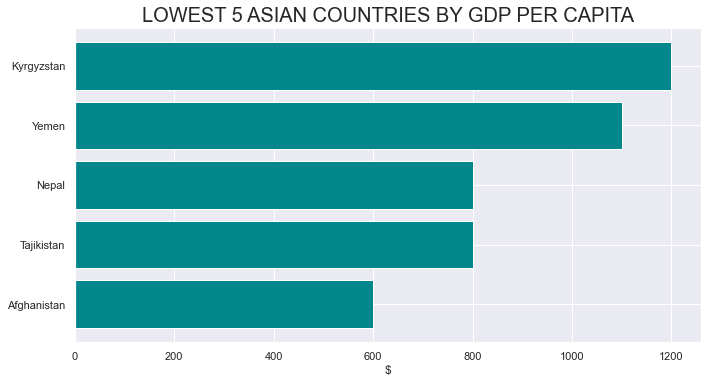

In [65]:
# Visualization plot
fig=py.figure(figsize=(10,5))
py.barh(asi['Name'],asi['GDP_per_Capita'],color='#00868B')
py.tight_layout()
py.xlabel('$')
py.title('LOWEST 5 ASIAN COUNTRIES BY GDP PER CAPITA',fontdict={'fontsize': 20})


In [66]:
asi=forbes[asia][forbes[asia].columns[1:3]].sort_values(forbes[asia].columns[2],ascending=False).head(5)
asi

,Name,GDP_Growth
115,Nepal,7.9
80,Armenia,7.5
108,Bangladesh,7.4
105,Bhutan,7.4
56,Turkey,7.4


Text(0.5, 1.0, 'TOP 5 ASIAN COUNTRIES BY GDP GROWTH')

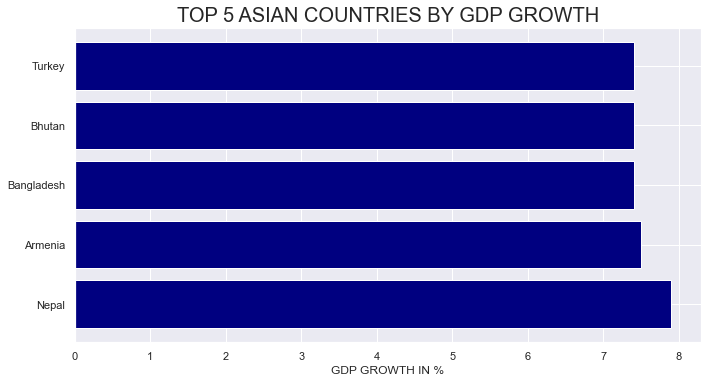

In [67]:
# Visualization plot
fig=py.figure(figsize=(10,5))
py.barh(asi['Name'],asi['GDP_Growth'],color='#000080')
py.tight_layout()
py.xlabel('GDP GROWTH IN %')
py.title('TOP 5 ASIAN COUNTRIES BY GDP GROWTH',fontdict={'fontsize': 20})


In [68]:
asi=forbes[asia][forbes[asia].columns[1:4:2]].sort_values(forbes[asia].columns[3],ascending=False).head(5)
asi

,Name,GDP_per_Capita
44,Qatar,63500
7,Singapore,57700
2,Hong Kong,46200
31,United Arab Emirates,40700
23,Israel,40300


Text(0.5, 1.0, 'TOP 5 ASIAN COUNTRIES BY GDP PER CAPITA')

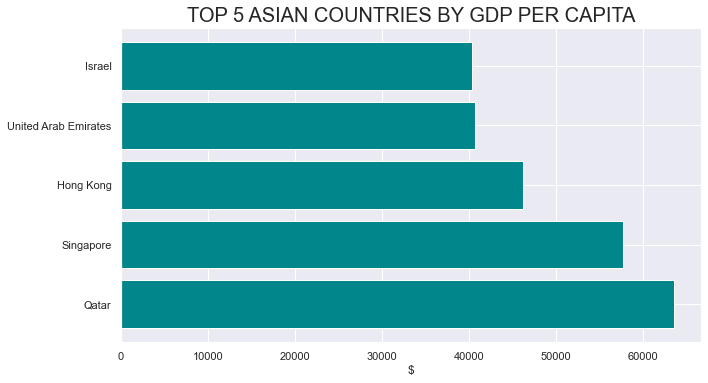

In [69]:
# Visualization plot
fig=py.figure(figsize=(10,5))
py.barh(asi['Name'],asi['GDP_per_Capita'],color='#00868B')
py.tight_layout()
py.xlabel('$')
py.title('TOP 5 ASIAN COUNTRIES BY GDP PER CAPITA',fontdict={'fontsize': 20})


In [70]:
forbes.groupby("Name")


In [71]:
australia =['Australia','Fiji', 'Kiribati','Marshall Islands', 'Nauru', 'Micronesia','New Zealand', 'Palau','Samoa', 
            'Papua New Guinea', 'Tonga', 'Solomon islands','Tuvalu', 'Vanuatu']

In [72]:
aus=forbes['Name'].isin(australia)

In [73]:
forbes[aus]

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade_balance/GDP,Number in text,Population,Millions
4,5,New Zealand,3.0,42900,-2.7,4.5,4.5,M
8,9,Australia,2.2,53800,-2.6,23.5,23.5,M
120,121,Papua New Guinea,2.5,2600,24.5,6,6.0,M


In [74]:
#  Australia countries with the lowest GDP Growth
ast=forbes[aus][forbes[aus].columns[1:3]].sort_values(forbes[aus].columns[2],ascending=True).head(5)
ast

,Name,GDP_Growth
8,Australia,2.2
120,Papua New Guinea,2.5
4,New Zealand,3.0


Text(0.5, 1.0, 'AUSTRALIA COUNTRIES BY GDP GROWTH')

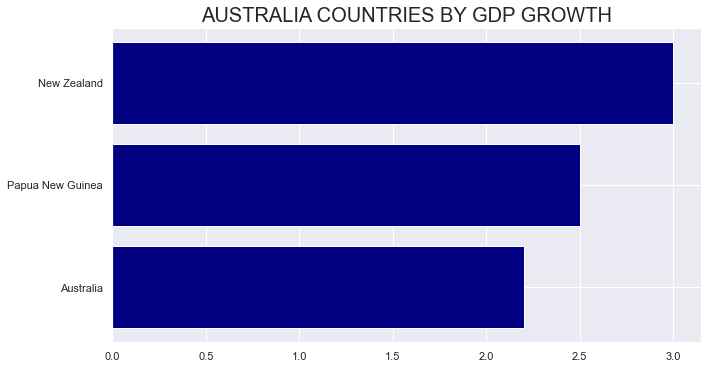

In [75]:
fig=py.figure(figsize=(10,5))
py.barh(ast['Name'],ast['GDP_Growth'],color='#000080')
py.tight_layout()

py.title('AUSTRALIA COUNTRIES BY GDP GROWTH',fontdict={'fontsize': 20})


In [76]:
ast=forbes[aus][forbes[aus].columns[1:4:2]].sort_values(forbes[aus].columns[3],ascending=False).head(5)
ast

,Name,GDP_per_Capita
8,Australia,53800
4,New Zealand,42900
120,Papua New Guinea,2600


Text(0.5, 1.0, 'AUSTRALIA COUNTRIES BY GDP PER CAPITA')

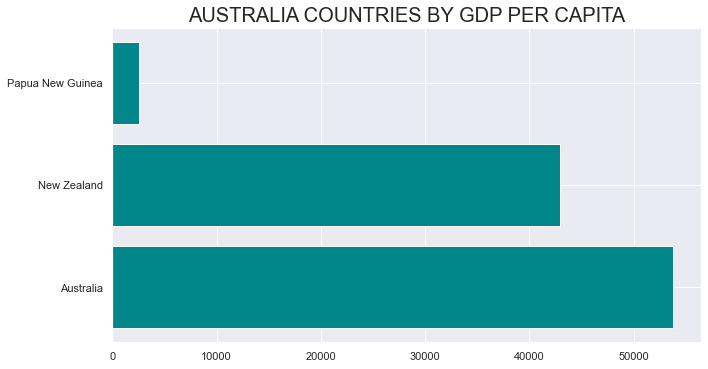

In [77]:
fig=py.figure(figsize=(10,5))
py.barh(ast['Name'],ast['GDP_per_Capita'],color='#00868B')
py.tight_layout()

py.title('AUSTRALIA COUNTRIES BY GDP PER CAPITA',fontdict={'fontsize': 20})


In [78]:
north_ame=['United States','Mexico','Canada','Guatemala','Haiti','Cuba','Dominican Republic',
           'Honduras','Nicaragua','El Salvador','Costa Rica','Panama','Jamaica','Trinidad And Tobago',
           'Belize','Bahamas','Barbados','Saint Lucia','Grenada','Saint Vincent And the Grenadines','Antigua And Barbuda'
'Dominica','Saint Kitts and Nevis']

In [79]:
nam=forbes['Name'].isin(north_ame)

In [80]:
forbes[nam]

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade_balance/GDP,Number in text,Population,Millions
5,6,Canada,3.0,45000,-2.9,35.9,35.9,M
16,17,United States,2.2,59500,-2.3,329.3,329.3,M
47,48,Costa Rica,3.3,11600,-2.9,4,4.0,M
53,54,Mexico,2.0,8900,-1.7,125,125.0,M
74,75,Panama,5.4,15100,-4.9,3.8,3.8,M
79,80,Jamaica,0.7,5100,-4.6,2.8,2.8,M
88,89,Barbados,-0.2,16800,-3.8,0.3,0.3,M
90,91,Dominican Republic,4.6,7100,-0.2,10.3,10.3,M
96,97,Guatemala,2.8,4500,1.5,16.6,16.6,M
100,101,El Salvador,2.3,3900,-2.0,6.2,6.2,M


In [81]:
#  North Americans countries with the lowest GDP Growth
nm=forbes[nam][forbes[nam].columns[1:3]].sort_values(forbes[nam].columns[2],ascending=True).head(5)
nm

,Name,GDP_Growth
88,Barbados,-0.2
79,Jamaica,0.7
155,Haiti,1.2
53,Mexico,2.0
16,United States,2.2


Text(0.5, 8.95999999999998, '%')

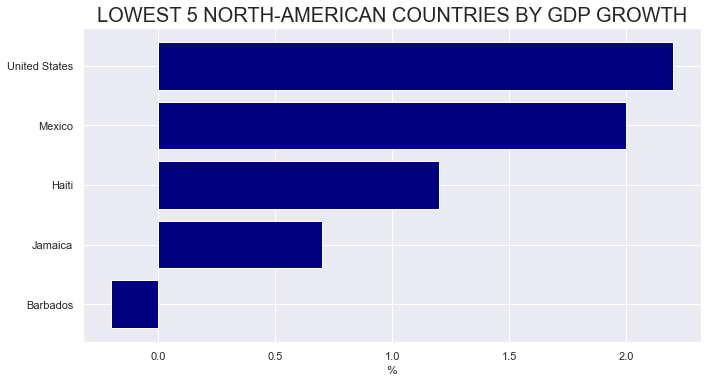

In [82]:
# Visualization plot
fig=py.figure(figsize=(10,5))
py.barh(nm['Name'],nm['GDP_Growth'],color='#000080')
py.tight_layout()
py.title('LOWEST 5 NORTH-AMERICAN COUNTRIES BY GDP GROWTH',fontdict={'fontsize': 20})
py.savefig('plt')
py.xlabel('%')

In [83]:
#  North Americans countries with the lowest GDP per Capita
nm=forbes[nam][forbes[nam].columns[1:4:2]].sort_values(forbes[nam].columns[3],ascending=True).head(5)
nm

,Name,GDP_per_Capita
155,Haiti,800
134,Nicaragua,2200
119,Honduras,2500
100,El Salvador,3900
96,Guatemala,4500


Text(0.5, 8.95999999999998, '$')

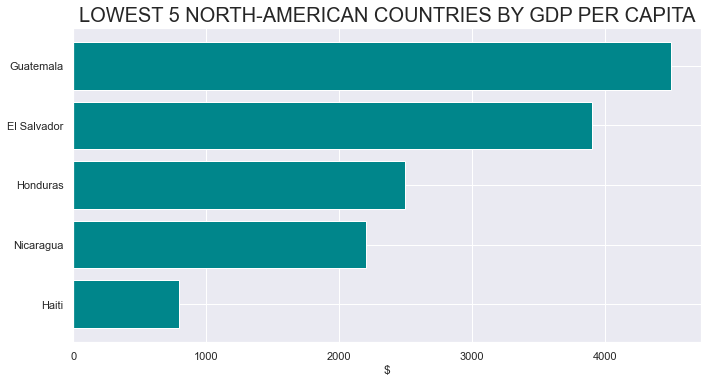

In [84]:
# Visualization plot
fig=py.figure(figsize=(10,5))
py.barh(nm['Name'],nm['GDP_per_Capita'],color='#00868B')
py.tight_layout()
py.title('LOWEST 5 NORTH-AMERICAN COUNTRIES BY GDP PER CAPITA',fontdict={'fontsize': 20})
py.savefig('plt')
py.xlabel('$')

In [85]:
#  North Americans countries with the highest GDP per Capita
nm=forbes[nam][forbes[nam].columns[1:4:2]].sort_values(forbes[nam].columns[3],ascending=False).head(5)
nm

,Name,GDP_per_Capita
16,United States,59500
5,Canada,45000
88,Barbados,16800
74,Panama,15100
47,Costa Rica,11600


Text(0.5, 8.95999999999998, '$')

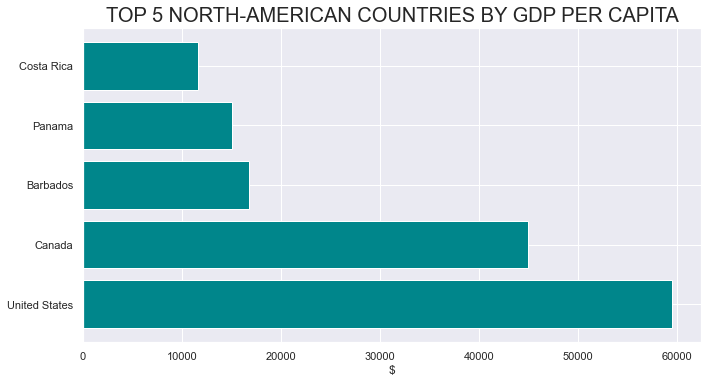

In [86]:
# Visualization plot
fig=py.figure(figsize=(10,5))
py.barh(nm['Name'],nm['GDP_per_Capita'],color='#00868B')
py.tight_layout()
py.title('TOP 5 NORTH-AMERICAN COUNTRIES BY GDP PER CAPITA',fontdict={'fontsize': 20})
py.savefig('plt')
py.xlabel('$')

In [87]:
#  North Americans countries with the highest GDP Growth
nm=forbes[nam][forbes[nam].columns[1:3]].sort_values(forbes[nam].columns[2],ascending=False).head(5)
nm

,Name,GDP_Growth
74,Panama,5.4
134,Nicaragua,4.9
119,Honduras,4.8
90,Dominican Republic,4.6
47,Costa Rica,3.3


Text(0.5, 8.95999999999998, '$')

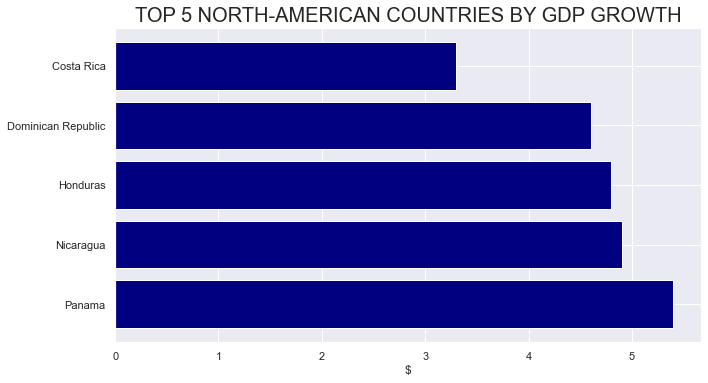

In [88]:
# Visualization plot
fig=py.figure(figsize=(10,5))
py.barh(nm['Name'],nm['GDP_Growth'],color='#000080')
py.tight_layout()
py.title('TOP 5 NORTH-AMERICAN COUNTRIES BY GDP GROWTH',fontdict={'fontsize': 20})
py.savefig('plt')
py.xlabel('$')

In [89]:
south_ame =['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay',
            'Peru', 'Suriname', 'Uruguay', 'Venezuela']

In [90]:
sam=forbes['Name'].isin(south_ame)

In [91]:
forbes[sam]

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade_balance/GDP,Number in text,Population,Millions
32,33,Chile,1.5,15300,-1.5,17.9,17.9,M
57,58,Uruguay,2.7,16200,1.5,3.4,3.4,M
63,64,Peru,2.5,6600,-1.1,31.3,31.3,M
66,67,Colombia,1.8,6300,-3.3,48.2,48.2,M
72,73,Brazil,1.0,9800,-0.5,208.8,208.8,M
75,76,Argentina,2.9,14400,-4.9,44.7,44.7,M
98,99,Ecuador,2.4,6200,-0.3,16.5,16.5,M
112,113,Guyana,2.1,4700,-6.7,0.7,0.7,M
114,114,Paraguay,4.8,4400,-0.8,6,6.0,M
127,128,Bolivia,4.2,3400,-6.3,11.3,11.3,M


In [92]:
#  South Americans countries with the lowest GDP Growth
sm=forbes[sam][forbes[sam].columns[1:3]].sort_values(forbes[sam].columns[2],ascending=True).head(5)
sm

,Name,GDP_Growth
142,Venezuela,-14.0
72,Brazil,1.0
32,Chile,1.5
66,Colombia,1.8
143,Suriname,1.9


Text(0.5, 8.95999999999998, '%')

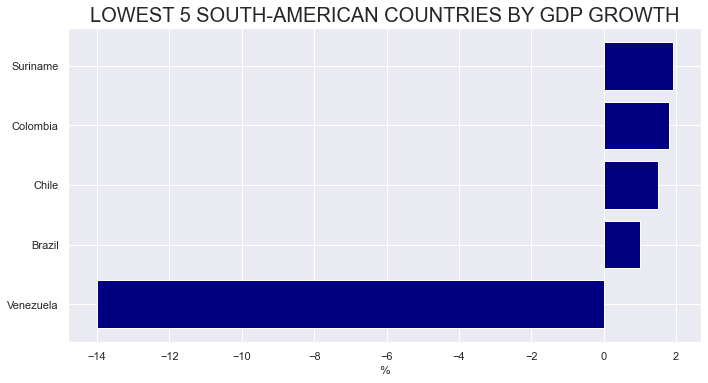

In [93]:
# Visualization plot
fig=py.figure(figsize=(10,5))
py.barh(sm['Name'],sm['GDP_Growth'],color='#000080')
py.tight_layout()
py.title('LOWEST 5 SOUTH-AMERICAN COUNTRIES BY GDP GROWTH',fontdict={'fontsize': 20})
py.savefig('plt')
py.xlabel('%')

In [94]:
#  South Americans countries with the highest GDP Growth
sm=forbes[sam][forbes[sam].columns[1:3]].sort_values(forbes[sam].columns[2],ascending=False).head(5)
sm

,Name,GDP_Growth
114,Paraguay,4.8
127,Bolivia,4.2
75,Argentina,2.9
57,Uruguay,2.7
63,Peru,2.5


Text(0.5, 8.95999999999998, '%')

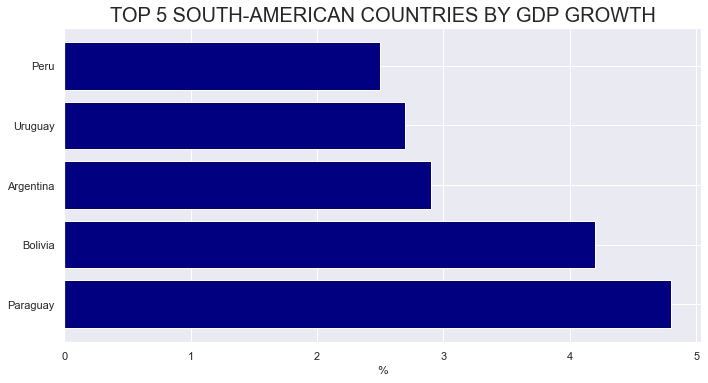

In [95]:
# Visualization plot
fig=py.figure(figsize=(10,5))
py.barh(sm['Name'],sm['GDP_Growth'],color='#000080')
py.tight_layout()
py.title('TOP 5 SOUTH-AMERICAN COUNTRIES BY GDP GROWTH',fontdict={'fontsize': 20})
py.savefig('plt')
py.xlabel('%')

In [96]:
#  South Americans countries with the lowest GDP per Capita
sc=forbes[sam][forbes[sam].columns[1:4:2]].sort_values(forbes[sam].columns[3],ascending=True).head(5)
sc

,Name,GDP_per_Capita
127,Bolivia,3400
114,Paraguay,4400
112,Guyana,4700
143,Suriname,5900
98,Ecuador,6200


Text(0.5, 8.95999999999998, '%')

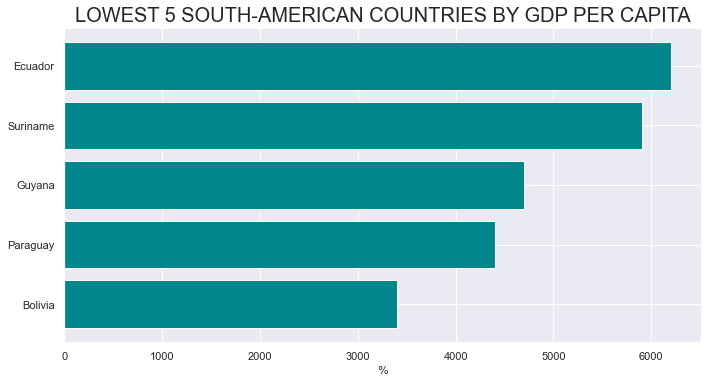

In [97]:
# Visualization plot
fig=py.figure(figsize=(10,5))
py.barh(sc['Name'],sc['GDP_per_Capita'],color='#00868B')
py.tight_layout()
py.title('LOWEST 5 SOUTH-AMERICAN COUNTRIES BY GDP PER CAPITA',fontdict={'fontsize': 20})
py.savefig('plt')
py.xlabel('%')

In [98]:
#  South Americans countries with the highest GDP per Capita
sc=forbes[sam][forbes[sam].columns[1:4:2]].sort_values(forbes[sam].columns[3],ascending=False).head(5)
sc

,Name,GDP_per_Capita
57,Uruguay,16200
32,Chile,15300
75,Argentina,14400
72,Brazil,9800
63,Peru,6600


Text(0.5, 8.95999999999998, '%')

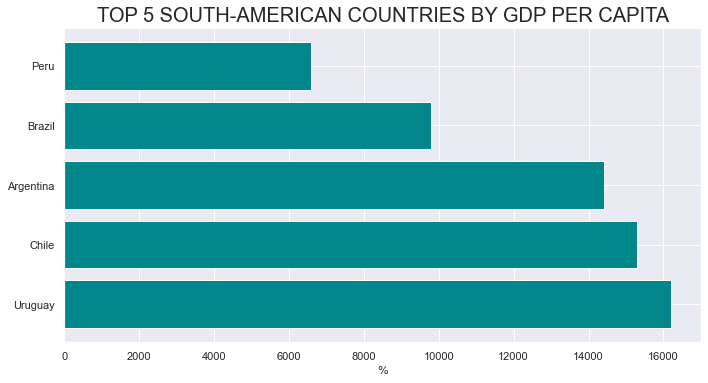

In [99]:
# Visualization plot
fig=py.figure(figsize=(10,5))
py.barh(sc['Name'],sc['GDP_per_Capita'],color='#00868B')
py.tight_layout()
py.title('TOP 5 SOUTH-AMERICAN COUNTRIES BY GDP PER CAPITA',fontdict={'fontsize': 20})
py.savefig('plt')
py.xlabel('%')

In [100]:
## Countries with the highest GDP Growth
#forbes.groupby('Name')[['GDP_Growth']].max().sort_values(by='GDP_Growth', ascending = False)

In [101]:
#forbes

In [102]:
#forbes.drop(columns=['Millions'], inplace = True)

In [103]:
#sns.pairplot(forbes)